# LNN SageMaker Algorithm

## 1. Set up the environment

In [1]:
import io
import boto3
import json
import datetime
import sagemaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SageMaker client
sagemaker_client = boto3.client("sagemaker")

# SageMaker session
sagemaker_session = sagemaker.Session()

# SageMaker role
role = sagemaker.get_execution_role()

# S3 bucket
bucket = sagemaker_session.default_bucket()

# EC2 instance
instance_type = "ml.m5.2xlarge"

# AWS account ID
account = sagemaker_session.account_id()

# AWS region
region = "eu-west-1"

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## 2. Create the algorithm

### 2.1 Create the training image

In [2]:
%%bash

algorithm_name=lnn-sagemaker-training
region=eu-west-1

cp amazon_sagemaker_algorithm/modules.py amazon_sagemaker_algorithm/training_image/model/modules.py

cd amazon_sagemaker_algorithm/training_image

account=$(aws sts get-caller-identity --query Account --output text)

fullname="${account}.dkr.ecr.${region}.amazonaws.com/${algorithm_name}:latest"

aws ecr describe-repositories --repository-names ${algorithm_name} || aws ecr create-repository --repository-name ${algorithm_name}

$(aws ecr get-login --region ${region} --no-include-email)

$(aws ecr get-login --registry-ids 763104351884 --region us-east-1 --no-include-email)

docker build  -t ${algorithm_name} . --build-arg REGION=${region}

docker tag ${algorithm_name} ${fullname}

docker push ${fullname}

{
    "repositories": [
        {
            "repositoryArn": "arn:aws:ecr:eu-west-1:661670223746:repository/lnn-sagemaker-training",
            "registryId": "661670223746",
            "repositoryName": "lnn-sagemaker-training",
            "repositoryUri": "661670223746.dkr.ecr.eu-west-1.amazonaws.com/lnn-sagemaker-training",
            "createdAt": 1759252271.604,
            "imageTagMutability": "MUTABLE",
            "imageScanningConfiguration": {
                "scanOnPush": false
            },
            "encryptionConfiguration": {
                "encryptionType": "AES256"
            }
        }
    ]
}


WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Login Succeeded


WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Login Succeeded


#0 building with "default" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 288B done
#1 DONE 0.0s

#2 [auth] sharing credentials for 763104351884.dkr.ecr.us-east-1.amazonaws.com
#2 DONE 0.0s

#3 [internal] load metadata for 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:2.1.0-gpu-py310-cu121-ubuntu20.04-sagemaker
#3 DONE 0.4s

#4 [internal] load .dockerignore
#4 transferring context: 2B done
#4 DONE 0.0s

#5 [internal] load build context
#5 transferring context: 18.02kB done
#5 DONE 0.0s

#6 [1/2] FROM 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:2.1.0-gpu-py310-cu121-ubuntu20.04-sagemaker@sha256:4ca33eda180d23556e2317c77e305018d4d1b03c741e0a59032fb3f52f8cd0a7
#6 resolve 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:2.1.0-gpu-py310-cu121-ubuntu20.04-sagemaker@sha256:4ca33eda180d23556e2317c77e305018d4d1b03c741e0a59032fb3f52f8cd0a7 done
#6 sha256:7a2c559011895d255fce249c00396abff

The push refers to repository [661670223746.dkr.ecr.eu-west-1.amazonaws.com/lnn-sagemaker-training]
69cb432c08c2: Preparing
56d13ac50708: Preparing
0f184ac86fd2: Preparing
c2c6a64abd76: Preparing
49d86b5ac326: Preparing
a6e3084abec4: Preparing
a4d06fa777e1: Preparing
c1b6d04f3229: Preparing
4aa1c901394c: Preparing
a4719d341686: Preparing
d8a02e6fbfa6: Preparing
3faa0aec1446: Preparing
f30790e63c98: Preparing
d63622f708c2: Preparing
c244c3e0a6e8: Preparing
d2bf8ba7e501: Preparing
f400211171be: Preparing
0b60b5d9c7b7: Preparing
a603c45e3b9a: Preparing
93b2ba476ee6: Preparing
24da279d75ec: Preparing
7f9864363d0d: Preparing
64cfecbbfe4a: Preparing
bcc8ed6de2d6: Preparing
4d777fa6c315: Preparing
8d18920b75a9: Preparing
93640654dced: Preparing
b1ed739d0b79: Preparing
9f6eb2a03520: Preparing
6db3e85ba2b6: Preparing
97f74f953a38: Preparing
2087de0d8708: Preparing
66135b7273b8: Preparing
d3a7b76799e4: Preparing
4811e0c6a00f: Preparing
07af57187e86: Preparing
09c63c8e699c: Preparing
d48694d371da

### 2.2 Create the inference image

In [3]:
%%bash

algorithm_name=lnn-sagemaker-inference
region=eu-west-1

cp amazon_sagemaker_algorithm/modules.py amazon_sagemaker_algorithm/inference_image/modules.py

cd amazon_sagemaker_algorithm/inference_image

account=$(aws sts get-caller-identity --query Account --output text)

fullname="${account}.dkr.ecr.${region}.amazonaws.com/${algorithm_name}:latest"

aws ecr describe-repositories --repository-names ${algorithm_name} || aws ecr create-repository --repository-name ${algorithm_name}

$(aws ecr get-login --region ${region} --no-include-email)

$(aws ecr get-login --registry-ids 763104351884 --region us-east-1 --no-include-email)

docker build  -t ${algorithm_name} . --build-arg REGION=${region}

docker tag ${algorithm_name} ${fullname}

docker push ${fullname}

{
    "repositories": [
        {
            "repositoryArn": "arn:aws:ecr:eu-west-1:661670223746:repository/lnn-sagemaker-inference",
            "registryId": "661670223746",
            "repositoryName": "lnn-sagemaker-inference",
            "repositoryUri": "661670223746.dkr.ecr.eu-west-1.amazonaws.com/lnn-sagemaker-inference",
            "createdAt": 1759254308.332,
            "imageTagMutability": "MUTABLE",
            "imageScanningConfiguration": {
                "scanOnPush": false
            },
            "encryptionConfiguration": {
                "encryptionType": "AES256"
            }
        }
    ]
}


WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Login Succeeded


WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Login Succeeded


#0 building with "default" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 386B done
#1 DONE 0.0s

#2 [internal] load metadata for 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:2.1.0-gpu-py310-cu118-ubuntu20.04-sagemaker
#2 ...

#3 [auth] sharing credentials for 763104351884.dkr.ecr.us-east-1.amazonaws.com
#3 DONE 0.0s

#2 [internal] load metadata for 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:2.1.0-gpu-py310-cu118-ubuntu20.04-sagemaker
#2 DONE 1.1s

#4 [internal] load .dockerignore
#4 transferring context: 2B done
#4 DONE 0.0s

#5 [internal] load build context
#5 transferring context: 23.34kB done
#5 DONE 0.0s

#6 [1/3] FROM 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:2.1.0-gpu-py310-cu118-ubuntu20.04-sagemaker@sha256:289b9cc83919a1b8f164c823f35a4358fd8763fdb4f09c186094e4770c75a3b0
#6 resolve 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:2.1.0-gpu-py31

The push refers to repository [661670223746.dkr.ecr.eu-west-1.amazonaws.com/lnn-sagemaker-inference]
c6880ad3bc9e: Preparing
f4c97e7d9da3: Preparing
6c5308e1899e: Preparing
56a438164ad8: Preparing
58f7908da0df: Preparing
7b86da28a44a: Preparing
72415c798704: Preparing
43995b645575: Preparing
4a3fcc18677d: Preparing
abad3f04755f: Preparing
dea7071dee7b: Preparing
3477e2f999bc: Preparing
9b315a0cf590: Preparing
381dca1a0d50: Preparing
9f7a2fb6d2f8: Preparing
76a54dae0863: Preparing
e7b5cc831b99: Preparing
54ed527bbb59: Preparing
e20cb4eefb3c: Preparing
3e17f92511b1: Preparing
9ce57089ebcd: Preparing
4cfab65836de: Preparing
4066bd636c75: Preparing
359e980677bd: Preparing
a87f45b65429: Preparing
5a10999c9c81: Preparing
8b947d811e03: Preparing
6ab3a86c6507: Preparing
5a2faaf96901: Preparing
d1abaa5d90b0: Preparing
ca2e67564430: Preparing
79597fac9746: Preparing
b2fba4b14ec4: Preparing
f344b08ff6c5: Preparing
86f0cc586e78: Preparing
33e57ea5b30a: Preparing
851dfeb18192: Preparing
6c3e7df3159

### 2.3 Create the algorithm

Load the list of supported hyperparameters.

In [4]:
with open("amazon_sagemaker_algorithm/hyperparameters.json", "r") as f:
    supported_hyperparameters = json.load(f)

Create the algorithm.

In [5]:
response = sagemaker_client.create_algorithm(
    AlgorithmName='lnn-sagemaker',
    TrainingSpecification={
        'TrainingImage': f'{account}.dkr.ecr.{region}.amazonaws.com/lnn-sagemaker-training:latest',
        'SupportedHyperParameters': supported_hyperparameters,
        'SupportsDistributedTraining': False,
        'MetricDefinitions': [
            {
                'Name': 'train_mse',
                'Regex': 'train_mse: ([0-9\.]+)'
            },
            {
                'Name': 'train_mae',
                'Regex': 'train_mae: ([0-9\.]+)'
            },
            {
                'Name': 'valid_mse',
                'Regex': 'valid_mse: ([0-9\.]+)'
            },
            {
                'Name': 'valid_mae',
                'Regex': 'valid_mae: ([0-9\.]+)'
            },
        ],
        'TrainingChannels': [
            {
                'Name': 'training',
                'IsRequired': True,
                'SupportedContentTypes': [
                    'text/csv',
                ],
                'SupportedInputModes': [
                    'File',
                ]
            },
            {
                'Name': 'validation',
                'IsRequired': False,
                'SupportedContentTypes': [
                    'text/csv',
                ],
                'SupportedInputModes': [
                    'File',
                ]
            },
            {
                'Name': 'model',
                'IsRequired': False,
                'SupportedContentTypes': [
                    'Gzip',
                ],
                'SupportedInputModes': [
                    'File',
                ]
            },
        ],
        'SupportedTuningJobObjectiveMetrics': [
            {
                'Type': 'Minimize',
                'MetricName': 'valid_mse'
            },
            {
                'Type': 'Minimize',
                'MetricName': 'valid_mae'
            },
        ],
        'SupportedTrainingInstanceTypes': [
            instance_type
        ],
    },
    InferenceSpecification={
        'Containers': [
            {
                'Image': f'{account}.dkr.ecr.{region}.amazonaws.com/lnn-sagemaker-inference:latest',

            }
        ],
        'SupportedContentTypes': [
            'text/csv'
        ],
        'SupportedResponseMIMETypes': [
             'text/csv'
        ],
        'SupportedTransformInstanceTypes': [
            instance_type
        ],
        'SupportedRealtimeInferenceInstanceTypes': [
            instance_type
        ],
    },
    CertifyForMarketplace=False,
)

Get the algorithm's ARN.

In [6]:
algorithm_arn = response['AlgorithmArn']

In [7]:
algorithm_arn

'arn:aws:sagemaker:eu-west-1:661670223746:algorithm/lnn-sagemaker'

## 3. Upload the data to S3

### 3.1 Training data

In [8]:
training_dataset = pd.read_csv("sample_data/train.csv")

In [9]:
training_dataset.shape

(1000, 5)

In [10]:
training_dataset.head()

,ts,x1,x2,y1,y2
0,0.0000,0.121642,-0.992107,2.627251,-21.043495
1,0.0005,-0.046251,-0.899425,-3.134639,-20.881941
2,0.0005,0.016789,-0.845949,-3.418829,-16.630003
3,0.0005,-0.020171,-1.000907,-7.383935,-20.160302
4,0.0005,-0.313692,-1.002584,-11.523211,-18.012853


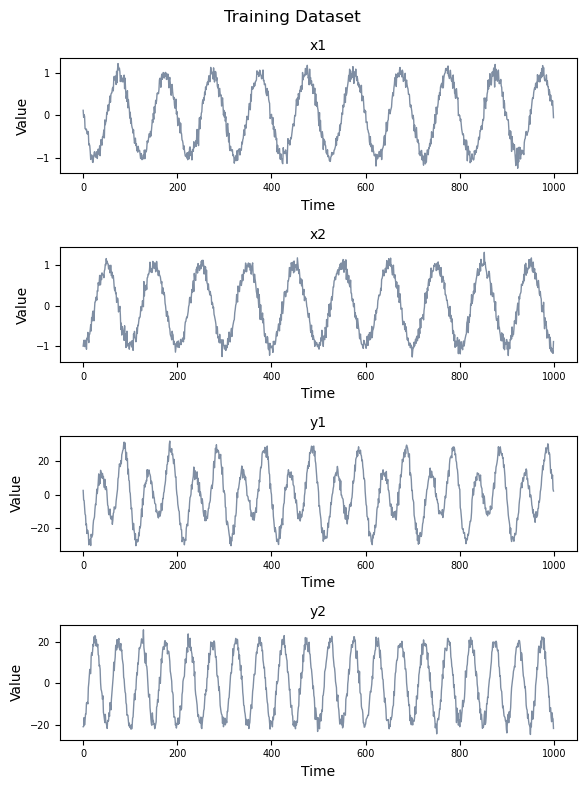

In [11]:
fig, axs = plt.subplots(nrows=len([c for c in training_dataset.columns if c != "ts"]), ncols=1, sharex=True, figsize=(6, 8))
for i, c in enumerate([c for c in training_dataset.columns if c != "ts"]):
    axs[i].plot(training_dataset[c], color="#7f8ea3", lw=1)
    axs[i].set_title(c, size=10)
    axs[i].set(xlabel="Time", ylabel="Value")
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis="both", which="major", labelsize=7)
    axs[i].tick_params(axis="both", which="minor", labelsize=7)
fig.suptitle("Training Dataset")
fig.tight_layout()
fig.show()

In [12]:
training_data = sagemaker_session.upload_string_as_file_body(
    body=training_dataset.to_csv(index=False),
    bucket=bucket,
    key="sample_data/train.csv"
)

In [13]:
training_data

's3://sagemaker-eu-west-1-661670223746/sample_data/train.csv'

### 3.2 Validation data

In [14]:
validation_dataset = pd.read_csv("sample_data/valid.csv")

In [15]:
validation_dataset.shape

(500, 5)

In [16]:
validation_dataset.head()

,ts,x1,x2,y1,y2
0,0.0005,-0.102191,-1.020255,-1.629867,-18.293319
1,0.0005,-0.196894,-0.825729,-5.875837,-15.153669
2,0.0005,-0.103916,-0.909815,-9.099113,-18.314596
3,0.0005,-0.128711,-1.021893,-10.430847,-17.330995
4,0.0005,-0.331239,-0.987491,-15.354902,-15.939409


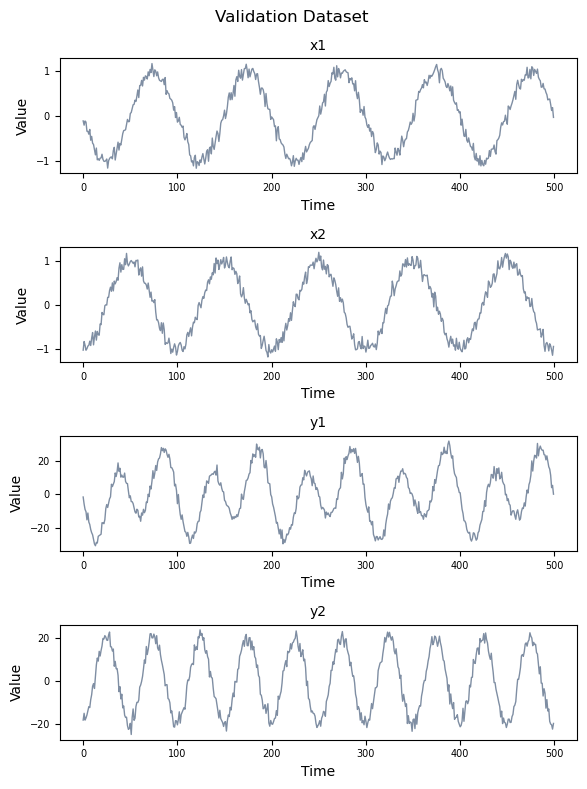

In [17]:
fig, axs = plt.subplots(nrows=len([c for c in validation_dataset.columns if c != "ts"]), ncols=1, sharex=True, figsize=(6, 8))
for i, c in enumerate([c for c in validation_dataset.columns if c != "ts"]):
    axs[i].plot(validation_dataset[c], color="#7f8ea3", lw=1)
    axs[i].set_title(c, size=10)
    axs[i].set(xlabel="Time", ylabel="Value")
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis="both", which="major", labelsize=7)
    axs[i].tick_params(axis="both", which="minor", labelsize=7)
fig.suptitle("Validation Dataset")
fig.tight_layout()
fig.show()

In [18]:
validation_data = sagemaker_session.upload_string_as_file_body(
    body=validation_dataset.to_csv(index=False),
    bucket=bucket,
    key="sample_data/valid.csv"
)

In [19]:
validation_data

's3://sagemaker-eu-west-1-661670223746/sample_data/valid.csv'

### 3.3 Test data

In [20]:
test_dataset = pd.read_csv("sample_data/test.csv")

In [21]:
test_dataset.shape

(500, 5)

In [22]:
test_dataset.head()

,ts,x1,x2,y1,y2
0,0.0005,-0.124333,-0.888155,-3.611156,-21.167402
1,0.0005,-0.124550,-0.972857,-7.578829,-21.938505
2,0.0005,-0.071144,-1.087489,-7.008032,-19.818385
3,0.0005,-0.165431,-0.965825,-8.733201,-16.944541
4,0.0005,-0.330729,-0.940734,-15.859760,-17.673990


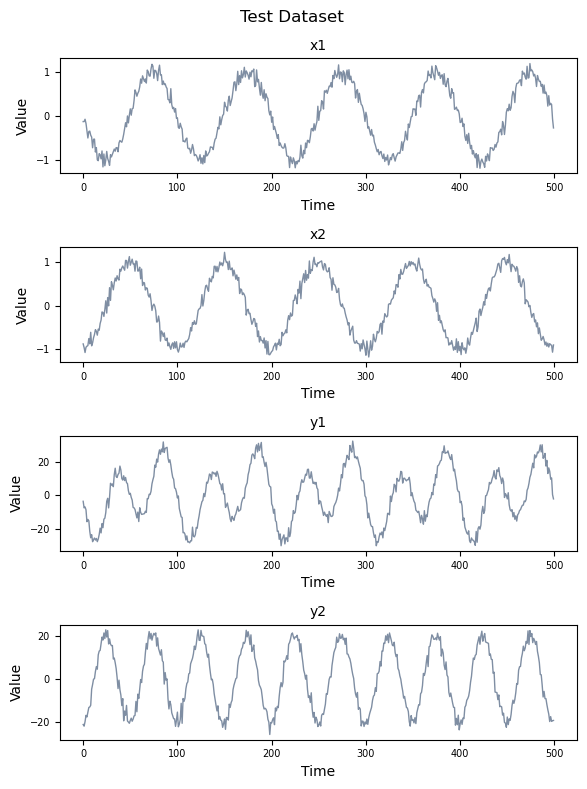

In [23]:
fig, axs = plt.subplots(nrows=len([c for c in test_dataset.columns if c != "ts"]), ncols=1, sharex=True, figsize=(6, 8))
for i, c in enumerate([c for c in test_dataset.columns if c != "ts"]):
    axs[i].plot(test_dataset[c], color="#7f8ea3", lw=1)
    axs[i].set_title(c, size=10)
    axs[i].set(xlabel="Time", ylabel="Value")
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis="both", which="major", labelsize=7)
    axs[i].tick_params(axis="both", which="minor", labelsize=7)
fig.suptitle("Test Dataset")
fig.tight_layout()
fig.show()

In [24]:
test_data = sagemaker_session.upload_string_as_file_body(
    body=test_dataset.to_csv(index=False),
    bucket=bucket,
    key="sample_data/test.csv"
)

In [25]:
test_data

's3://sagemaker-eu-west-1-661670223746/sample_data/test.csv'

## 4. Run a training job

Define the hyperparameters.

In [26]:
hyperparameters = {
    "context-length": 200,
    "prediction-length": 100,
    "sequence-stride": 1,
    "backbone-layers": 1,
    "backbone-units": 128,
    "backbone-activation": "silu",
    "backbone-dropout": 0,
    "hidden-size": 64,
    "minimal": 0,
    "no-gate": 0,
    "use-ltc": 0,
    "use-mixed": 0,
    "lr": 0.001,
    "lr-decay": 0.999,
    "batch-size": 64,
    "epochs": 50,
}

Create the estimator.

In [27]:
estimator = sagemaker.algorithm.AlgorithmEstimator(
    algorithm_arn=algorithm_arn,
    base_job_name="lnn-training",
    role=role,
    instance_count=1,
    instance_type=instance_type,
    input_mode="File",
    sagemaker_session=sagemaker_session,
    hyperparameters=hyperparameters,
)

Fit the estimator.

In [29]:
estimator.fit({"training": training_data, "validation": validation_data})

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: lnn-training-2025-10-01-08-03-40-315


2025-10-01 08:03:40 Starting - Starting the training job...
2025-10-01 08:04:09 Starting - Preparing the instances for training...
2025-10-01 08:04:44 Downloading - Downloading the training image.....................
2025-10-01 08:07:51 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/opt/conda/lib/python3.10/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/opt/conda/lib/python3.10/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
2025-10-01 08:08:11,947 sagemaker-training-toolkit INFO

## 5. Run an incremental training job

Get the URI of the pre-trained model.

In [30]:
model_uri = f's3://{bucket}/{estimator.latest_training_job.name}/output/model.tar.gz'

Create the estimator.

In [31]:
estimator = sagemaker.algorithm.AlgorithmEstimator(
    model_uri=model_uri,
    algorithm_arn=algorithm_arn,
    base_job_name="lnn-fine-tuning",
    role=role,
    instance_count=1,
    instance_type=instance_type,
    input_mode="File",
    sagemaker_session=sagemaker_session,
    hyperparameters=hyperparameters
)

Fit the estimator.

In [32]:
estimator.fit({"training": training_data, "validation": validation_data})

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: lnn-fine-tuning-2025-10-01-08-11-30-028


2025-10-01 08:11:32 Starting - Starting the training job...
2025-10-01 08:11:46 Starting - Preparing the instances for training...
2025-10-01 08:12:21 Downloading - Downloading the training image.....................
2025-10-01 08:15:43 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/opt/conda/lib/python3.10/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/opt/conda/lib/python3.10/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
2025-10-01 08:15:54,052 sagemaker-training-toolkit INFO 

## 6. Run a hyperparameter tuning job

Detach the pre-trained model.

In [33]:
estimator.model_uri = None

Define the hyperparameter ranges.

In [34]:
hyperparameter_ranges = {
    "backbone-layers": sagemaker.parameter.IntegerParameter(1, 3),
    "backbone-units": sagemaker.parameter.CategoricalParameter([32, 64, 128, 256]),
    "backbone-activation": sagemaker.parameter.CategoricalParameter(["silu", "relu", "tanh", "gelu", "lecun"]),
    "backbone-dropout": sagemaker.parameter.ContinuousParameter(0, 0.5),
    "hidden-size": sagemaker.parameter.CategoricalParameter([32, 64, 128, 256]),
    "lr": sagemaker.parameter.ContinuousParameter(0.0001, 0.01),
    "lr-decay": sagemaker.parameter.ContinuousParameter(0.9, 1.0),
    "batch-size": sagemaker.parameter.CategoricalParameter([32, 64, 128, 256]),
    "epochs": sagemaker.parameter.IntegerParameter(20, 200),
}

Create the hyperparameter tuner.

In [35]:
tuner = sagemaker.tuner.HyperparameterTuner(
    estimator=estimator,
    base_tuning_job_name="lnn-tuning",
    objective_metric_name="valid_mae",
    objective_type="Minimize",
    hyperparameter_ranges=hyperparameter_ranges,
    max_jobs=4,
    max_parallel_jobs=4,
    random_seed=100,
)

Run the hyperparameter tuner.

In [36]:
tuner.fit({"training": training_data, "validation": validation_data})

INFO:sagemaker:Creating hyperparameter tuning job with name: lnn-tuning-251001-0818


...................................................................................................................................................................................................................!


Get the best hyperparameters.

In [37]:
tuning_job_result = sagemaker_session.sagemaker_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner.latest_tuning_job.name
)

In [38]:
print("Best hyperparameters:")
tuning_job_result["BestTrainingJob"]["TunedHyperParameters"]

Best hyperparameters:


{'backbone-activation': 'gelu',
 'backbone-dropout': '0.2956067352669055',
 'backbone-layers': '1',
 'backbone-units': '64',
 'batch-size': '64',
 'epochs': '197',
 'hidden-size': '32',
 'lr': '0.006776639721916928',
 'lr-decay': '0.9782453713778745'}

In [39]:
print("Best score:")
tuning_job_result["BestTrainingJob"]["FinalHyperParameterTuningJobObjectiveMetric"]["Value"]

Best score:


0.028874510899186134

## 7. Run a batch transform job

Create the transformer.

In [40]:
transformer = estimator.transformer(
    instance_count=1,
    instance_type=instance_type,
)

INFO:sagemaker:Creating model package with name: lnn-sagemaker-2025-10-01-08-36-22-090


.........

INFO:sagemaker:Creating model with name: lnn-sagemaker-2025-10-01-08-36-22-090-2025-10-01-08-37-07-529


In [41]:
transformer.base_transform_job_name = "lnn-transform"

Run the batch transform job.

In [42]:
transformer.transform(
    data=test_data,
    content_type="text/csv",
)

INFO:sagemaker:Creating transform job with name: lnn-transform-2025-10-01-08-37-08-297


2025-10-01T08:44:50,706 [WARN ] main org.pytorch.serve.util.ConfigManager - Your torchserve instance can access any URL to load models. When deploying to production, make sure to limit the set of allowed_urls in config.properties
2025-10-01T08:44:50,709 [INFO ] main org.pytorch.serve.servingsdk.impl.PluginsManager - Initializing plugins manager...
2025-10-01T08:44:50,768 [INFO ] main org.pytorch.serve.metrics.configuration.MetricConfiguration - Successfully loaded metrics configuration from /opt/conda/lib/python3.10/site-packages/ts/configs/metrics.yaml
2025-10-01T08:44:50,886 [INFO ] main org.pytorch.serve.ModelServer - 
Torchserve version: 0.11.0
TS Home: /opt/conda/lib/python3.10/site-packages
Current directory: /
Temp directory: /home/model-server/tmp
Metrics config path: /opt/conda/lib/python3.10/site-packages/ts/configs/metrics.yaml
Number of GPUs: 0
Number of CPUs: 8
Max heap size: 7924 M
Python executable: /opt/conda/bin/python3.10
Config file: /etc/sagemaker-ts.properties
Infe

Load the predictions from S3.

In [43]:
batch_predictions = sagemaker_session.read_s3_file(
    bucket=bucket,
    key_prefix=f"{transformer.latest_transform_job.name}/test.csv.out"
)

batch_predictions = pd.read_csv(io.StringIO(batch_predictions), dtype=float)

In [44]:
batch_predictions.shape

(600, 4)

In [45]:
batch_predictions.head()

,y1_mean,y1_std,y2_mean,y2_std
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [46]:
batch_predictions.tail()

,y1_mean,y1_std,y2_mean,y2_std
595,11.077118,2.327890,-16.994116,2.207869
596,7.974410,2.280835,-18.382240,2.148462
597,4.983987,2.252448,-18.028560,2.304434
598,2.382181,2.389343,-19.242182,2.237700
599,-1.046188,2.341685,-19.737051,2.224695


In [47]:
batch_predictions.isna().sum(axis=0)

y1_mean    200
y1_std     200
y2_mean    200
y2_std     200
dtype: int64

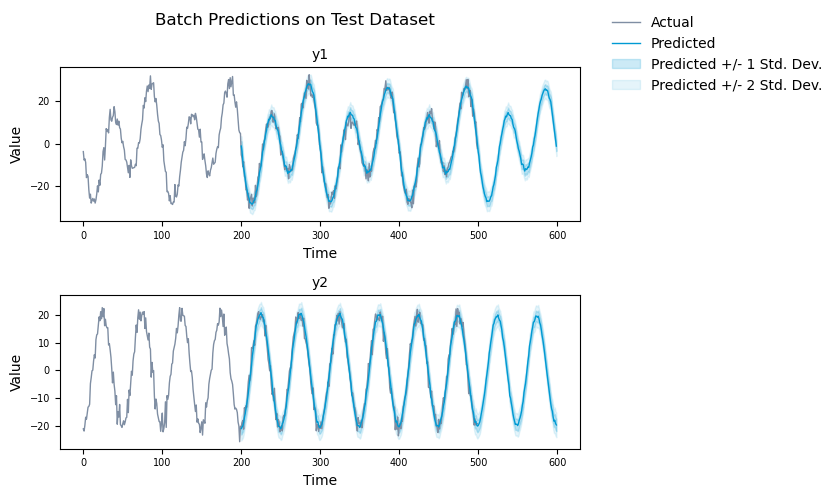

In [48]:
fig, axs = plt.subplots(nrows=len([c for c in test_dataset.columns if c.startswith("y")]), ncols=1, sharex=True, figsize=(6, 5))
for i, c in enumerate([c for c in test_dataset.columns if c.startswith("y")]):
    axs[i].plot(test_dataset.index, test_dataset[c].values, color="#7f8ea3", lw=1, label="Actual" if i == 0 else None)
    axs[i].plot(batch_predictions.index, batch_predictions[f"{c}_mean"].values, color="#009ad3", lw=1, label="Predicted" if i == 0 else None)
    axs[i].fill_between(batch_predictions.index, batch_predictions[f"{c}_mean"].values + batch_predictions[f"{c}_std"].values, batch_predictions[f"{c}_mean"].values - batch_predictions[f"{c}_std"].values, color="#009ad3", alpha=0.2, lw=1, label="Predicted +/- 1 Std. Dev." if i == 0 else None)
    axs[i].fill_between(batch_predictions.index, batch_predictions[f"{c}_mean"].values + 2 * batch_predictions[f"{c}_std"].values, batch_predictions[f"{c}_mean"].values - 2 * batch_predictions[f"{c}_std"].values, color="#009ad3", alpha=0.1, lw=1, label="Predicted +/- 2 Std. Dev." if i == 0 else None)
    axs[i].set_title(c, size=10)
    axs[i].set(xlabel="Time", ylabel="Value")
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis="both", which="major", labelsize=7)
    axs[i].tick_params(axis="both", which="minor", labelsize=7)
fig.suptitle("Batch Predictions on Test Dataset")
fig.legend(bbox_to_anchor=(1, 0, 0.4, 1), frameon=False)
fig.tight_layout()
fig.show()

Delete the model.

In [49]:
transformer.delete_model()

INFO:sagemaker:Deleting model with name: lnn-sagemaker-2025-10-01-08-36-22-090-2025-10-01-08-37-07-529


## 8. Perform real-time inference

Create the endpoint.

In [50]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type=instance_type,
    model_name=f"lnn-model-{datetime.datetime.now().strftime(format='%Y-%m-%d-%H-%M-%S-%f')}",
    endpoint_name=f"lnn-endpoint-{datetime.datetime.now().strftime(format='%Y-%m-%d-%H-%M-%S-%f')}",
)

INFO:sagemaker:Creating model package with name: lnn-model-2025-10-01-08-45-33-503410


.........

INFO:sagemaker:Creating model with name: lnn-model-2025-10-01-08-45-33-503410


INFO:sagemaker:Creating endpoint-config with name lnn-endpoint-2025-10-01-08-45-33-503435
INFO:sagemaker:Creating endpoint with name lnn-endpoint-2025-10-01-08-45-33-503435


----------!

Invoke the endpoint.

In [51]:
response = sagemaker_session.sagemaker_runtime_client.invoke_endpoint(
    EndpointName=predictor.endpoint_name,
    ContentType="text/csv",
    Body=test_dataset.to_csv(index=False)
)

Extract the predictions from the response.

In [52]:
deserializer = sagemaker.base_deserializers.PandasDeserializer(accept="text/csv")

real_time_predictions = deserializer.deserialize(response["Body"], content_type="text/csv")

In [53]:
real_time_predictions.shape

(600, 4)

In [54]:
real_time_predictions.head()

,y1_mean,y1_std,y2_mean,y2_std
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [55]:
real_time_predictions.tail()

,y1_mean,y1_std,y2_mean,y2_std
595,11.077118,2.327890,-16.994116,2.207869
596,7.974410,2.280835,-18.382240,2.148462
597,4.983987,2.252448,-18.028560,2.304434
598,2.382181,2.389343,-19.242182,2.237700
599,-1.046188,2.341685,-19.737051,2.224695


In [56]:
real_time_predictions.isna().sum(axis=0)

y1_mean    200
y1_std     200
y2_mean    200
y2_std     200
dtype: int64

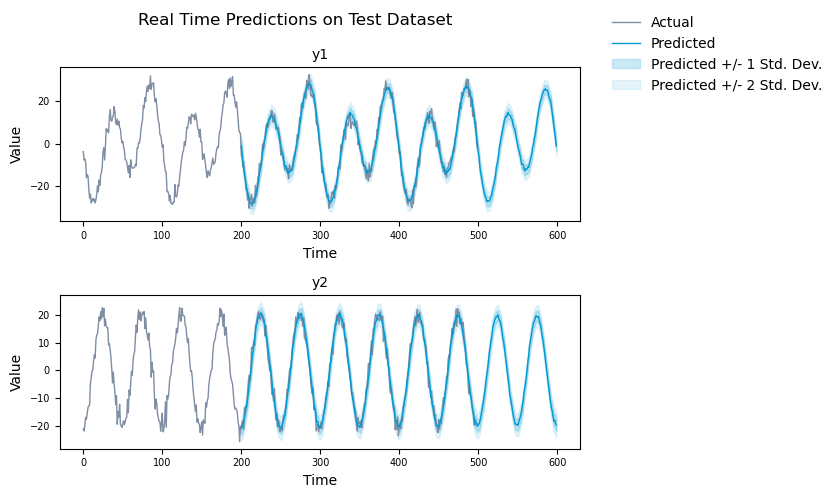

In [57]:
fig, axs = plt.subplots(nrows=len([c for c in test_dataset.columns if c.startswith("y")]), ncols=1, sharex=True, figsize=(6, 5))
for i, c in enumerate([c for c in test_dataset.columns if c.startswith("y")]):
    axs[i].plot(test_dataset.index, test_dataset[c].values, color="#7f8ea3", lw=1, label="Actual" if i == 0 else None)
    axs[i].plot(real_time_predictions.index, real_time_predictions[f"{c}_mean"].values, color="#009ad3", lw=1, label="Predicted" if i == 0 else None)
    axs[i].fill_between(real_time_predictions.index, real_time_predictions[f"{c}_mean"].values + real_time_predictions[f"{c}_std"].values, real_time_predictions[f"{c}_mean"].values - real_time_predictions[f"{c}_std"].values, color="#009ad3", alpha=0.2, lw=1, label="Predicted +/- 1 Std. Dev." if i == 0 else None)
    axs[i].fill_between(real_time_predictions.index, real_time_predictions[f"{c}_mean"].values + 2 * real_time_predictions[f"{c}_std"].values, real_time_predictions[f"{c}_mean"].values - 2 * real_time_predictions[f"{c}_std"].values, color="#009ad3", alpha=0.1, lw=1, label="Predicted +/- 2 Std. Dev." if i == 0 else None)
    axs[i].set_title(c, size=10)
    axs[i].set(xlabel="Time", ylabel="Value")
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis="both", which="major", labelsize=7)
    axs[i].tick_params(axis="both", which="minor", labelsize=7)
fig.suptitle("Real Time Predictions on Test Dataset")
fig.legend(bbox_to_anchor=(1, 0, 0.4, 1), frameon=False)
fig.tight_layout()
fig.show()

Delete the model.

In [58]:
predictor.delete_model()

INFO:sagemaker:Deleting model with name: lnn-model-2025-10-01-08-45-33-503410


Delete the endpoint.

In [59]:
predictor.delete_endpoint(delete_endpoint_config=True)

INFO:sagemaker:Deleting endpoint configuration with name: lnn-endpoint-2025-10-01-08-45-33-503435
INFO:sagemaker:Deleting endpoint with name: lnn-endpoint-2025-10-01-08-45-33-503435
